## ANÁLISE EXPLORATÓRIA - PROJETO MACHIRON  

### Autor:  
Renato Campos Afonso

### Proposta:    
Realizar uma análise exploratória dos dados utilizando um Notebook Jupyter.  

### Sobre o dataset:  
Este conjunto de dados contém informações sobre todos os 802 Pokémon das Sete Gerações de Pokémon. As informações contidas neste conjunto de dados incluem Estatísticas Básicas, Desempenho contra Outros Tipos, Altura, Peso, Classificação, Passos de Ovo, Pontos de Experiência, Habilidades, etc. As informações foram raspadas de http://serebii.net/

### Sobre as variáveis:  
name: O nome em inglês do Pokémon  
japanese_name: O nome original japonês do Pokémon  
pokedex_number: O número de entrada do Pokémon na Pokédex Nacional  
percentage_male: A porcentagem da espécie que é do sexo masculino. Vazio se o Pokémon for sem gênero  
type1: O tipo primário do Pokémon  
type2: O tipo secundário do Pokémon  
classification: A classificação do Pokémon conforme descrito na Pokédex Sol e Lua  
height_m: Altura do Pokémon em metros  
weight_kg: O peso do Pokémon em quilogramas  
capture_rate: Taxa de captura do Pokémon  
base_egg_steps: O número de passos necessários para chocar um ovo do Pokémon   
abilities: Uma lista de habilidades que o Pokémon é capaz de ter, em formato de texto  
experience_growth: O crescimento da experiência do Pokémon  
base_happiness: Felicidade base do Pokémon  
against_?: Dezoito características que denotam a quantidade de dano sofrido contra um ataque de um tipo específico  
hp: O HP base do Pokémon (Pontos de Vida)  
attack: O Ataque base do Pokémon  
defense: A Defesa base do Pokémon  
sp_attack: O Ataque Especial base do Pokémon  
sp_defense: A Defesa Especial base do Pokémon  
speed: A Velocidade base do Pokémon  
generation: A geração em que o Pokémon foi introduzido pela primeira vez  
is_legendary: Indica se o Pokémon é lendário  


### Fonte:  
https://www.kaggle.com/datasets/rounakbanik/pokemon


## RESUMO

Dentro de algumas sugestões de análises sugeridas pelo kaggle, decidi focar em análises para obter informações sobre pokemóns lendários (classificados pela variável is_legendary) e, desta forma, tentar identificar diferenças que possam ser úteis para um possível modelo preditivo.

Devido ao grande número de covariáveis, é importante tentar aplicar algum método para diminuir a dimensão dos dados - realizei um teste com PCA com 13 variáveis que identifiquei como candidatas a partir das análises de correlação - obtive de 5 a 6 componentes que explicam aproximadamente 80% da variabilidade dos dados.

A variável type2 contém muitos dados nulos, então achei interessante mantê-la fora da análise para evitar qualquer tipo de viés.

Foi aplicado o método Mutual Information para identificar as variáveis com potencial preditivo, tornando possível selecionar as que desempenam um melhor resultado - destaque para base_egg_steps: O número de passos necessários para chocar um ovo do Pokémon. Das três primeiras variáveis que se destacaram, fiz uma análise gráfica com boxplot para checar as diferenças entre os níves de pokemóns lendários e não lendário - é possível notar que existe diferença aparentemente significativa, porém não foi encontrado simetria na distribuição destes dados, além de existirem muitos pontos atípicos.


### Bibliotecas utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

### Ler arquivo

In [3]:
df = pd.read_csv('pokemon.csv')
print("São ", df.shape[0], " observações e ", df.shape[1],  " variáveis.")

São  801  observações e  41  variáveis.


In [93]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Variáveis quantitativas  

#### Contínuas  
height_m; weight_kg; percentage_male; hp; attack; base_egg_steps; base_happiness; capture_rate; base_total; capture_rate; experience_growth; defense; sp_attack; percentage_male; sp_defense; speed; against

#### Discretas  
0  

### Variáveis qualitativas  

#### Ordinais  
generation; capture_rate

#### Nominais  
name; japanese_name; type1; type2; classification; abilities; pokedex_number  

#### Dicotômicas  
is_legendary  


### Dados nulos  

In [94]:
x = df.isnull().sum()
x[x>0]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

### Tratamento dados nulos
Vamos desconsiderar a coluna type2 e aplicar a média para demais valores faltantes das variáveis quantitativas

In [95]:
df = df.drop(columns=['type2'])

In [96]:
my_imputer = SimpleImputer()
df[['height_m','percentage_male', 'weight_kg']] = pd.DataFrame(my_imputer.fit_transform(df[['height_m','percentage_male', 'weight_kg']]))

### Resumo descritivo para as variáveis contínuas

In [198]:
df[['attack', 'speed', 'sp_attack', 'defense', 'sp_defense', 'experience_growth', 'height_m', 'weight_kg', 'base_happiness', 'base_egg_steps']].describe()

,attack,speed,sp_attack,defense,sp_defense,experience_growth,height_m,weight_kg,base_happiness,base_egg_steps
count,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000
mean,77.857678,66.334582,71.305868,73.008739,70.911361,1.054996e+06,1.163892,61.378105,65.362047,7191.011236
std,32.158820,28.907662,32.353826,30.769159,27.942501,1.602558e+05,1.066737,107.979179,19.598948,6558.220422
min,5.000000,5.000000,10.000000,5.000000,20.000000,6.000000e+05,0.100000,0.100000,0.000000,1280.000000
25%,55.000000,45.000000,45.000000,50.000000,50.000000,1.000000e+06,0.600000,9.300000,70.000000,5120.000000
50%,75.000000,65.000000,65.000000,70.000000,66.000000,1.000000e+06,1.000000,28.500000,70.000000,5120.000000
75%,100.000000,85.000000,91.000000,90.000000,90.000000,1.059860e+06,1.500000,61.500000,70.000000,6400.000000
max,185.000000,180.000000,194.000000,230.000000,230.000000,1.640000e+06,14.500000,999.900000,140.000000,30720.000000


### Análises de agrupamento

In [97]:
df['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [129]:
df[['type1', 'is_legendary']].groupby(['type1'])\
.mean().sort_values(by='is_legendary', ascending=False).head()

,is_legendary
type1,
flying,0.333333
psychic,0.320755
dragon,0.259259
steel,0.250000
electric,0.128205


In [130]:
df[['capture_rate', 'is_legendary']].groupby(['capture_rate'])\
.mean().sort_values(by='is_legendary', ascending=False).head()

,is_legendary
capture_rate,
3,0.913793
15,0.500000
25,0.153846
30,0.050000
45,0.044000


In [163]:
df[['generation', 'is_legendary']].groupby(['generation'])\
.mean().sort_values(by='is_legendary', ascending=False)

,is_legendary
generation,
7,0.212500
4,0.121495
5,0.083333
6,0.083333
3,0.074074
2,0.060000
1,0.033113


### Análises gráficas

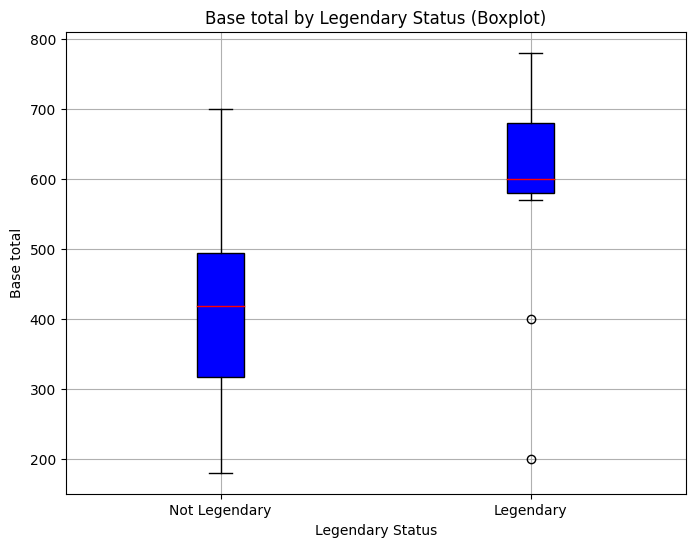

In [194]:
# Separar os dados para cada categoria de 'is_legendary'
legendary_data = df[df['is_legendary'] == 1]['base_total']
not_legendary_data = df[df['is_legendary'] == 0]['base_total']

# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([not_legendary_data, legendary_data], labels=['Not Legendary', 'Legendary'], patch_artist=True, boxprops=dict(facecolor='blue', color='black'), medianprops=dict(color='red'))

plt.xlabel('Legendary Status')
plt.ylabel('Base total')
plt.title('Base total by Legendary Status (Boxplot)')
plt.grid(True)
plt.show()

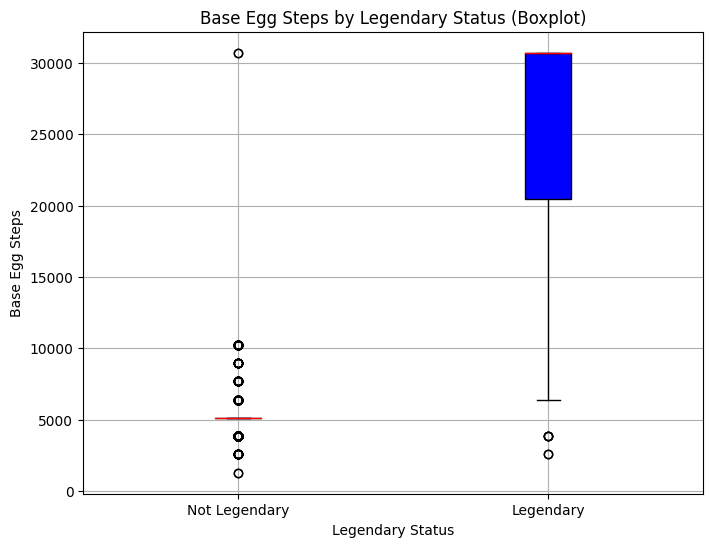

In [193]:
# Separar os dados para cada categoria de 'is_legendary'
legendary_data = df[df['is_legendary'] == 1]['base_egg_steps']
not_legendary_data = df[df['is_legendary'] == 0]['base_egg_steps']

# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([not_legendary_data, legendary_data], labels=['Not Legendary', 'Legendary'], patch_artist=True, boxprops=dict(facecolor='blue', color='black'), medianprops=dict(color='red'))

plt.xlabel('Legendary Status')
plt.ylabel('Base Egg Steps')
plt.title('Base Egg Steps by Legendary Status (Boxplot)')
plt.grid(True)
plt.show()

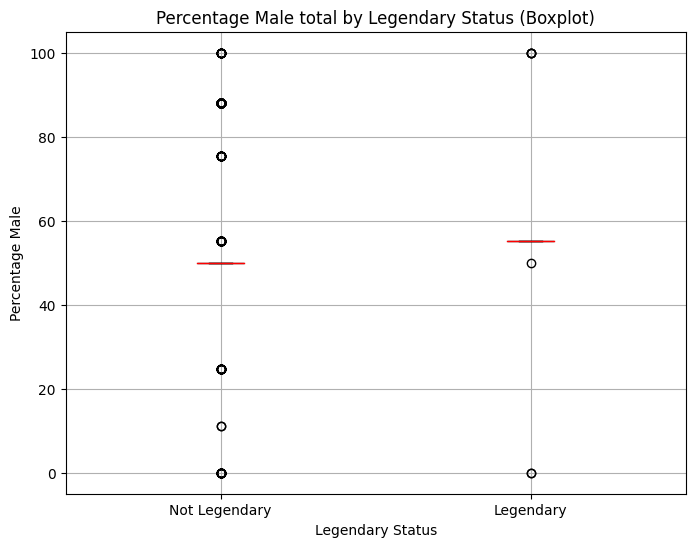

In [195]:
# Separar os dados para cada categoria de 'is_legendary'
legendary_data = df[df['is_legendary'] == 1]['percentage_male']
not_legendary_data = df[df['is_legendary'] == 0]['percentage_male']

# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([not_legendary_data, legendary_data], labels=['Not Legendary', 'Legendary'], patch_artist=True, boxprops=dict(facecolor='blue', color='black'), medianprops=dict(color='red'))

plt.xlabel('Legendary Status')
plt.ylabel('Percentage Male')
plt.title('Percentage Male total by Legendary Status (Boxplot)')
plt.grid(True)
plt.show()

### Análise de correlação

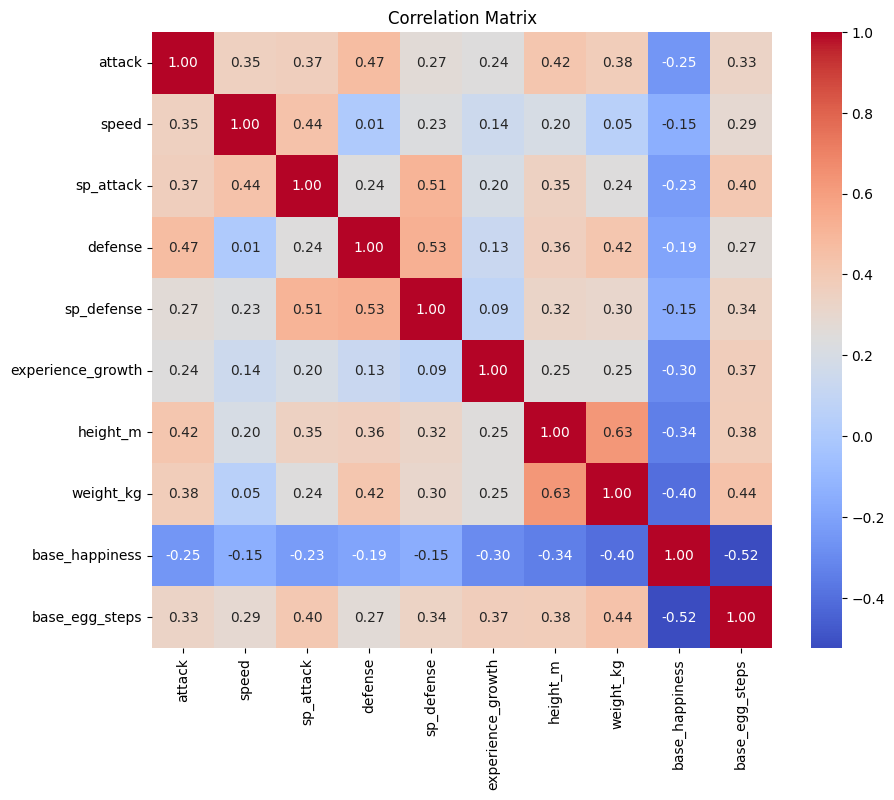

In [126]:
correlation_matrix = df[['attack', 'speed', 'sp_attack', 'defense', 'sp_defense', 'experience_growth', 'height_m', 'weight_kg', 'base_happiness', 'base_egg_steps']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

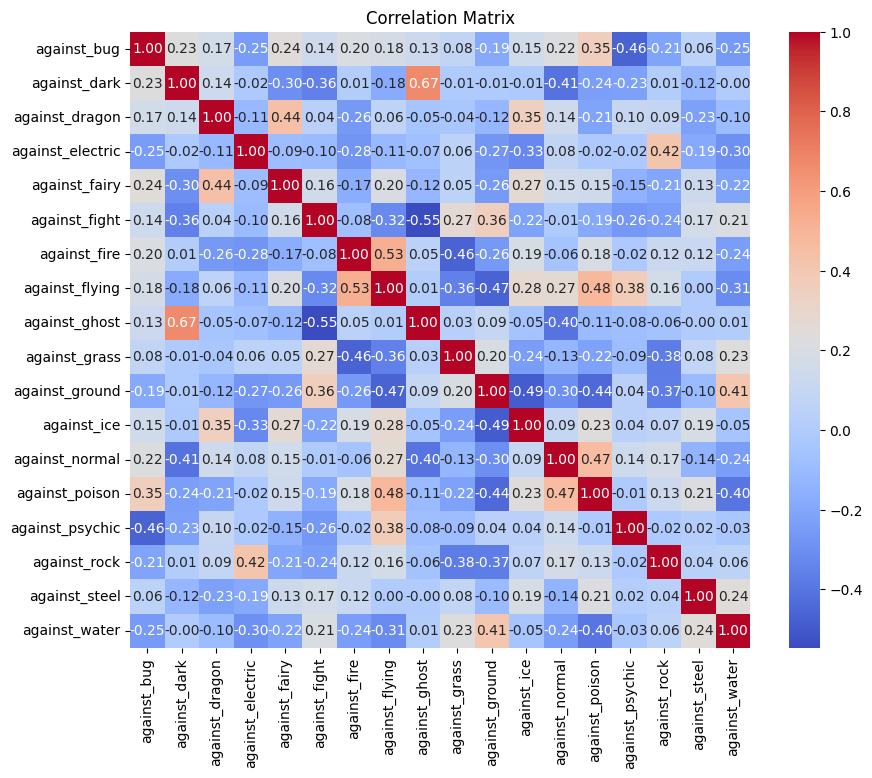

In [143]:
correlation_matrix = df[['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Análise de componentes principal - PCA

Motivação: tentar reduzir o número de variáveis para a analise e tratar problemas relacionado à multicolinearidade.

A Análise de Componentes Principais (PCA - Principal Component Analysis) é uma técnica de redução de dimensionalidade usada para transformar um conjunto de variáveis correlacionadas em um novo conjunto de variáveis não correlacionadas, chamadas de componentes principais. 

Resultados obtidos: como as variáveis não têm muita correlação, o método não mostrou muita eficiência; entretanto, utilizando de 5 a 6 componentes, é possível explicar aproximadamente 80% da variabilidade dos dados, o que pode ser útil para testes futuros.

In [144]:
features = ['attack',
       'base_egg_steps', 'base_happiness', 'base_total','defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male','sp_attack', 'sp_defense', 'speed','weight_kg']
X = df.copy()
y = X.pop('is_legendary')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [147]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)



In [146]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
attack,0.313651,-0.097096,-0.012816,-0.265544,0.290383,-0.201815,-0.504266,-0.286305,-0.217970,0.089451,-0.002212,0.501817,2.299411e-01
base_egg_steps,0.298134,0.265738,-0.257265,0.092969,-0.237596,0.070590,0.166591,-0.439105,0.439737,0.397192,-0.347320,0.109128,-3.885781e-16
base_happiness,-0.213933,-0.471024,0.255313,0.039032,0.398397,-0.243178,0.201352,0.159071,0.376165,0.465081,-0.105074,0.114531,-2.081668e-16
base_total,0.419043,-0.280525,0.019379,0.010539,-0.001941,-0.067296,-0.064274,-0.049718,-0.045470,-0.032395,0.042178,-0.052256,-8.523261e-01
defense,0.271807,-0.052678,0.459371,-0.225769,-0.328499,-0.313573,-0.263325,0.022812,0.105416,0.076678,-0.151859,-0.544790,2.200048e-01
experience_growth,0.179813,0.346534,-0.311473,0.072824,0.112732,-0.764089,0.214184,0.303119,-0.002972,-0.080166,0.065800,0.014177,8.673617e-17
height_m,0.310100,0.223631,0.158546,0.006452,0.299020,0.310792,-0.016923,0.505131,-0.034132,-0.107067,-0.606552,0.081646,6.938894e-18
hp,0.285593,-0.027740,0.179272,0.235544,0.511698,0.025380,0.338976,-0.463871,-0.015293,-0.325432,0.072574,-0.299955,1.900231e-01
percentage_male,0.041899,-0.082371,-0.212956,-0.872895,0.082784,0.103770,0.373937,0.000490,0.094238,-0.106416,0.012821,-0.079640,-5.551115e-17
sp_attack,0.305287,-0.303116,-0.225323,0.117944,-0.127854,0.111805,0.287531,0.146124,-0.581809,0.452450,0.028527,-0.140797,2.313354e-01


In [148]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

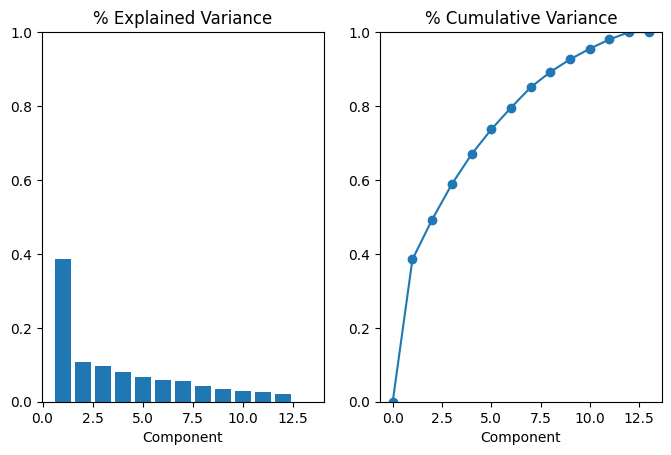

In [149]:
plot_variance(pca);

### Mutual information

Motivação: tentar identificar variáveis mais relevantes em um possível processo de predição, considerando como variável resposta is_legendary (se o pokemón é lendário)

Em problemas de aprendizado de máquina, a MI é usada para identificar as variáveis mais informativas, ou seja, aquelas que têm maior dependência com a variável resposta. Isso ajuda a reduzir a dimensionalidade do conjunto de dados e melhorar a eficiência do modelo.

Resultados obtidos: é possível identificar variáveis predominantes para o processo de classificação dos pokemóns como lendário, com destaque para base_egg_steps, base_total e percentage_male  

obs: a variável base_total não está definida no projeto

In [166]:
X = df.copy()
X = X.drop(columns=['abilities', 'pokedex_number', 'name', 'japanese_name', 'classfication'])
y = X.pop("is_legendary")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [190]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores.head()  # show a few features with their MI scores

base_egg_steps     0.244013
base_total         0.221993
percentage_male    0.186461
base_happiness     0.175712
capture_rate       0.173379
Name: MI Scores, dtype: float64

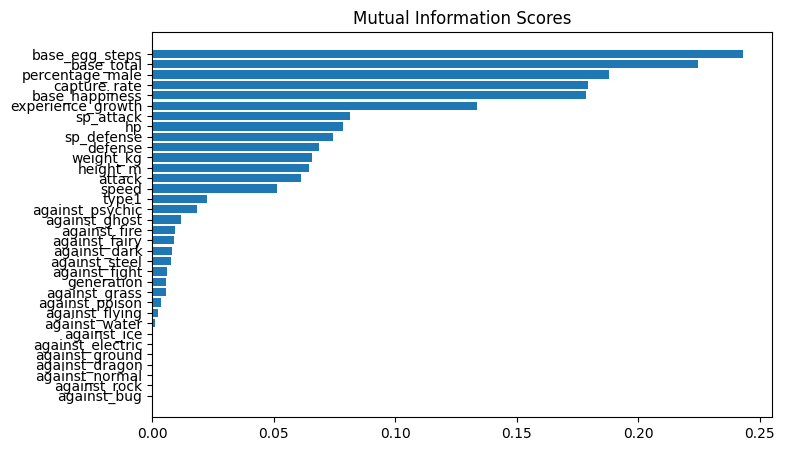

In [188]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)